# Semiconductor Manufacturing Process

#### Context:

A complex modern semiconductor manufacturing process is normally 
under constant surveillance via the monitoring of signals variables collected from 
sensors and or process measurement points. However, not all of these signals are 
equally valuable in a specific monitoring system. The measured signals contain a 
combination of useful information, irrelevant information as well as noise. Engineers 
typically have a much larger number of signals than are required. If we consider each 
type of signal as a feature, then feature selection may be applied to identify the most 
relevant signals. The Process Engineers may then use these signals to determine key 
factors contributing to yield excursions downstream in the process. This will enable an 
increase in process throughput, decreased time to learning and reduce the per unit 
production costs. These signals can be used as features to predict the yield type. And by 
analysing and trying out different combinations of features, essential signals that are 
impacting the yield type can be identified.

#### DATA DESCRIPTION: sensor-data.csv : (1567, 592)

The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each 
example represents a single production entity with associated measured features and 
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” 
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that 
specific test point.

#### PROJECT OBJECTIVE:

We will build a classifier to predict the Pass/Fail yield of a 
particular process entity and analyse whether all the features are required to build the 
model or not.


### 1. Importing and Exporting the data.

Importing the data as csv file using pandas and printing the top 5 rows and the characteristics of the given dataset.

Before that, we import the necessary libraries.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"D:\ai project\sensor-data.csv")

In [16]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
(1567, 592)


In [21]:
data.head



<bound method NDFrame.head of                      Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...   

We can assume there are 590 independent processes that together add up to create a semiconductor and at the end of the process they are tagged as success or failure in terms of creating 1 new functional semiconductor unit.
There are quite a few NaN entries and entries which are equal to the value 0.
The 0s are not sparse you can see quite a few of them in continuation which may indicate an error or lack of data i/o.
We must either impute or drop them because these duplicate values will not help in determining/predicting target.
Lets find out which are the most important features in terms of predicting our target,and also the ones we can eliminate which have most of these error or missing values.
Also the datetime feature doesnt any significance here so we should be able to drop it without any problem.

### 2. Data cleansing: • Missing value treatment. • Drop attribute/s if required using relevant functional knowledge. • Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

#### Missing value treatment.

1) First of all, we are checking for any missing values present in the data.

2) After checking the missing values from the given dataset, we try separating the numeric and non-numeric columns of the dataset.

3) Separating the numeric and non-numeric columns of the dataset, we handle the missing values we found in the first step.

4) Using 'forward fill' method to handle the missing values in the non-numeric column.

5) Finally, we verify if all the missing values are verified in the data cleansing process.

In [23]:
data.isnull().any().any()


True

In [24]:
# 1
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# 2
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# 3
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# 4
data[non_numeric_columns] = data[non_numeric_columns].fillna(method='ffill')

# 5
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation[missing_values_after_imputation > 0])

Missing values in each column:
 0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64
Missing values after imputation:
 Series([], dtype: int64)


C:\Users\hi\AppData\Local\Temp\ipykernel_16880\401659672.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[non_numeric_columns] = data[non_numeric_columns].fillna(method='ffill')


#### The below code shows the statistical summary after the missing value treatment.

In [25]:
data.describe()


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,54.936224,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,91.549650,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,97.934373,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,97.934373,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


As we can see the number of missing values are quite large and sometimes more than half the values of the columns are entirely missing, we can consider dropping them altogether as the inconsistensies in between the rows of processes will not help in predicting the target variable.
Some of the columns are entirely filled with the value of 0 which we should eliminate as well.
Some features even exhibit negative values and many may have outliers on the higher side as we can see from the gap between max and 75%

In [33]:
data.dtypes.value_counts()


float64    590
object       1
int64        1
Name: count, dtype: int64

104 vlaues belong to the fail Category and 1463 to Pass. Large Class imbalance can be seen.
We earlier saw a large number of missing values,Accurately imputing them will be a challenge plus it will be difficult to even verify so we should remove some features manually.

We can see that 2  columns have more than a half of the data missing, so we will be dropping them.



In [38]:
data_df=data.drop(empty_cols,axis=1)
data_df.shape

(1567, 592)

In [39]:
nunique = data_df.apply(pd.Series.nunique)
nunique

Time         1534
0            1521
1            1505
2             508
3             519
             ... 
586           323
587           261
588           121
589           612
Pass/Fail       2
Length: 592, dtype: int64

In [40]:
const_cols = nunique[nunique == 1].index
const_cols.shape

(116,)

As we can see of the 564 remaining features 116 of them only have 1 unique value which indicates a faulty data across all batches and therefore we will frop these also.

In [41]:
data_df=data_df.drop(const_cols,axis=1)
data_df.shape

(1567, 476)

The feature "Time" may or may not be useful in predicting the target, we can visually explore it to eee if it provides any meanigful data.

In [42]:
data_df['year'] = pd.DatetimeIndex(data_df['Time']).year
data_df['month'] = pd.DatetimeIndex(data_df['Time']).month
data_df['date'] = pd.DatetimeIndex(data_df['Time']).day
data_df['week_day'] = pd.DatetimeIndex(data_df['Time']).weekday
data_df['start_time'] = pd.DatetimeIndex(data_df['Time']).time
data_df['hour'] = pd.DatetimeIndex(data_df['Time']).hour
data_df['min'] = pd.DatetimeIndex(data_df['Time']).minute
data_df=data_df.drop('Time',axis=1)

C:\Users\hi\AppData\Local\Temp\ipykernel_16880\1609413064.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df['year'] = pd.DatetimeIndex(data_df['Time']).year
C:\Users\hi\AppData\Local\Temp\ipykernel_16880\1609413064.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df['month'] = pd.DatetimeIndex(data_df['Time']).month
C:\Users\hi\AppData\Local\Temp\ipykernel_16880\1609413064.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

In [43]:
data_df.head()

,0,1,2,3,4,6,7,8,9,10,...,588,589,Pass/Fail,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.005283,99.670066,-1,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.006000,208.204500,-1,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.014800,82.860200,1,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.004400,73.843200,-1,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.004400,73.843200,-1,2008,7,19,5,15:22:00,15,22


In [45]:
year = data_df.year.unique()
month = data_df.month.unique()
date = data_df.date.unique()
week = data_df.week_day.unique()
print(f'unique no of years = {year}\nunique no of months = {month}\nunique no of date ={date}\nunique no of weeks = {week}')


unique no of years = [2008]
unique no of months = [ 7  1  2  3  4  5  6  8  9 10 11 12]
unique no of date =[19 20 21 22 23 25 27 28 29 30 31  8 13 15 16 17 18 24  9 14 26 10]
unique no of weeks = [5 6 0 1 2 4 3]


Data received is from all the months of the 2008 calendar year cycle. Although it is not recorded everyday of the month but we can see that production happens throughout the week even on Sundays.



C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

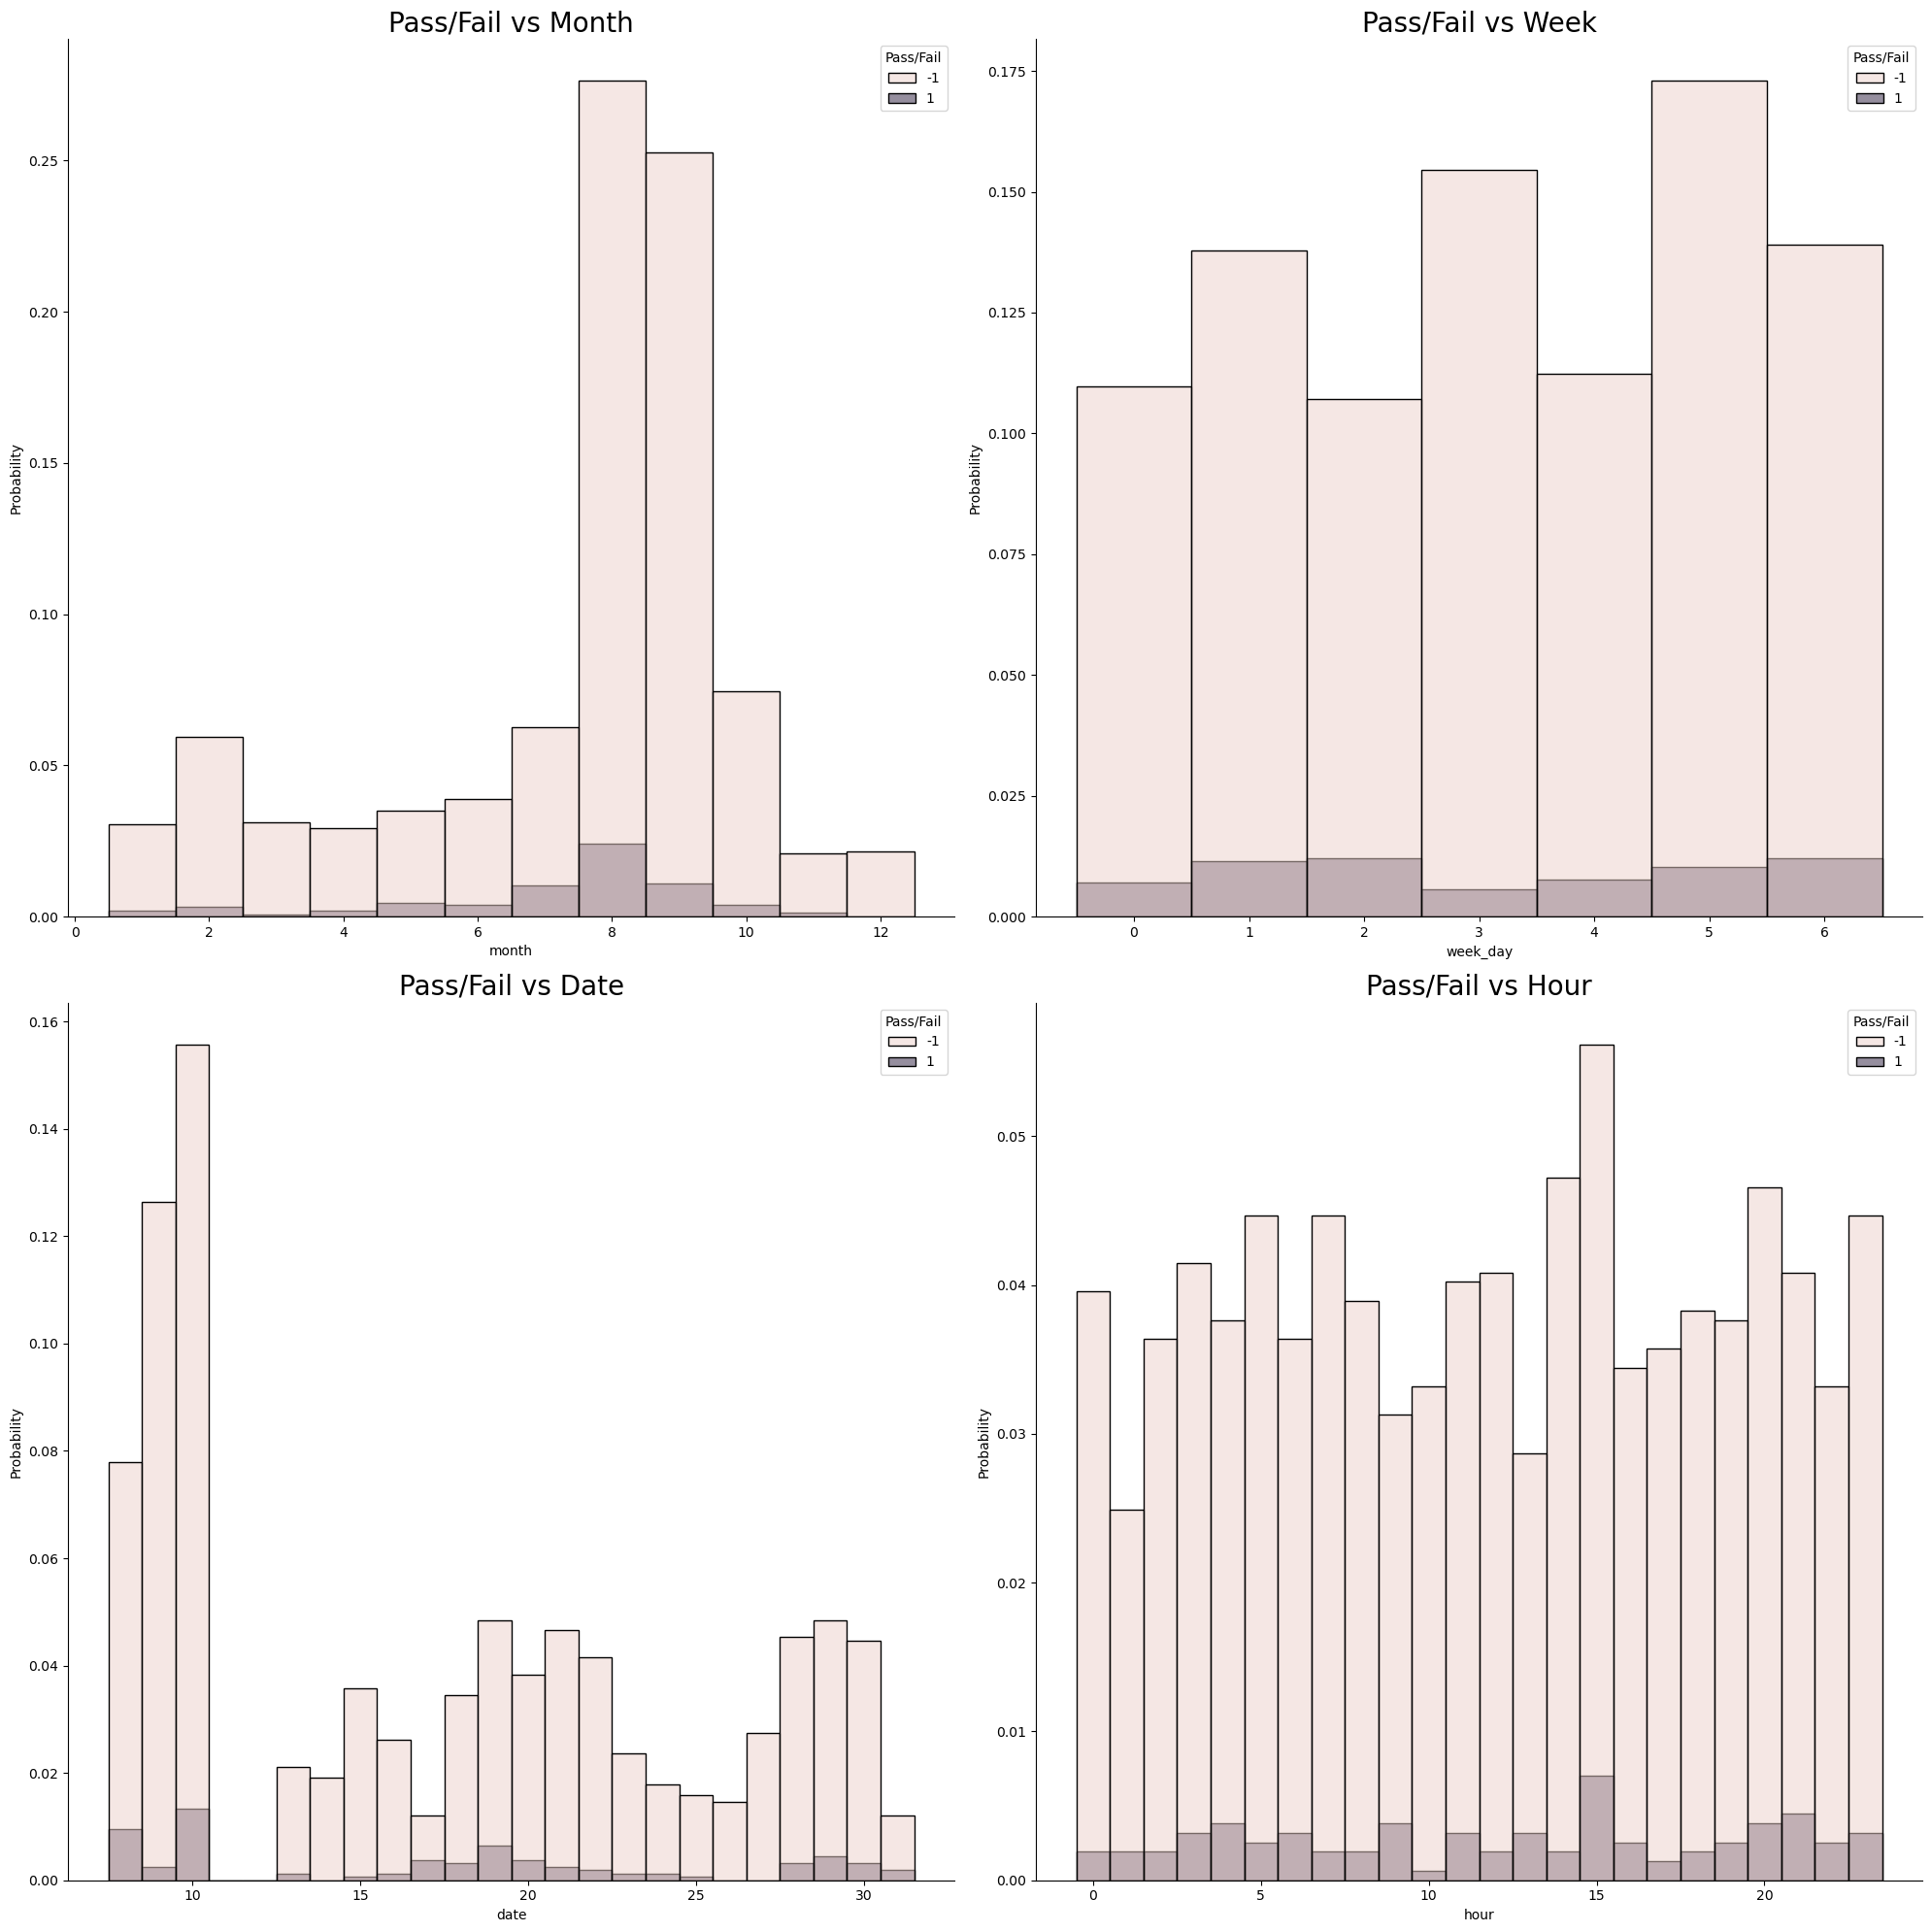

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_df, x="month", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Month', fontsize=20)

plt.subplot(2, 2, 2)
sns.histplot(data=data_df, x="week_day", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Week', fontsize=20)

plt.subplot(2, 2, 3)
sns.histplot(data=data_df, x="date", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Date', fontsize=20)

# Subplot 4: Pass/Fail vs
plt.subplot(2, 2, 4)
sns.histplot(data=data_df, x="hour", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Hour', fontsize=20)

plt.tight_layout()
plt.show()


On deeper analysis we can observe:
This is a 24/7 around the clock production facility working on all days of the year.
No significant pattern can be seen as such on a daily basis, except end of the weekday has a slightly higher value than most days.
Usually the first 10 days of every month is the busiest.
The production facility seems to be the busiest during the months of August and September, the abnormally high volumes can be a market response of the product.

These explorations help us understand the profile of the facility but do not provide significant insight into why a semiconductor failed in the production cyle.The distribution of success to failure follows the same distribution whether we analyse it hourly/daily/monthly or over the period of the entire year of 2008.Therefore we will drop these features.

We can see that 24  columns have more than a quarter  of the data missing, so we will be dropping them too , to get a clan data set




In [50]:
data_df2=data_df1.drop(empty_cols,axis=1)
data_df2.shape

(1567, 475)

In [52]:
data_df2.fillna(data_df2.mean(), inplace=True)
data_df2.isnull().sum().sum()


0

In [ ]:
desc_stats = data_df2.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.209271     0.008936     0.073849     0.015107     0.009296 

### 3. Data analysis & visualisation

### Univariate Analysis


We perform detailed data analysis on the dataset given and then proceeding with univariate, bivariate and multivariate analysis.
1. Detailed Statistical Analysis
First, we will perform basic statistical analysis to understand the distribution of the data.

C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


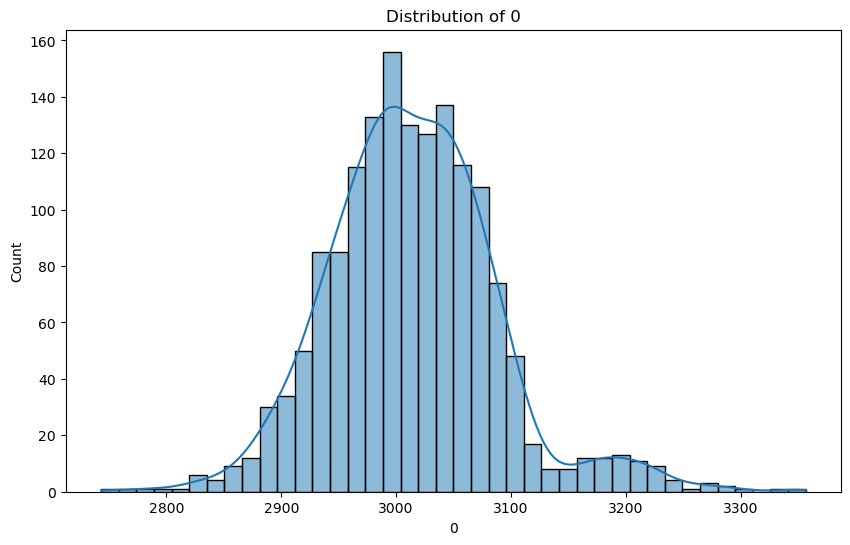

C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


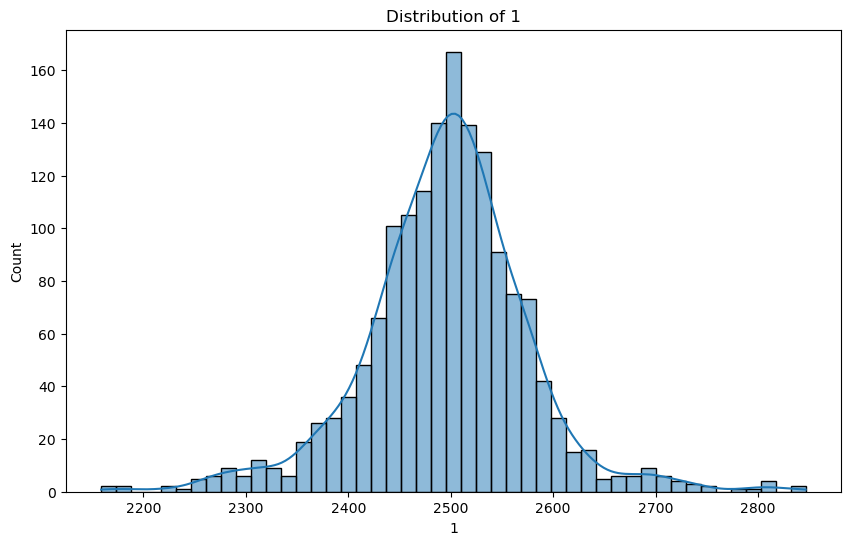

C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


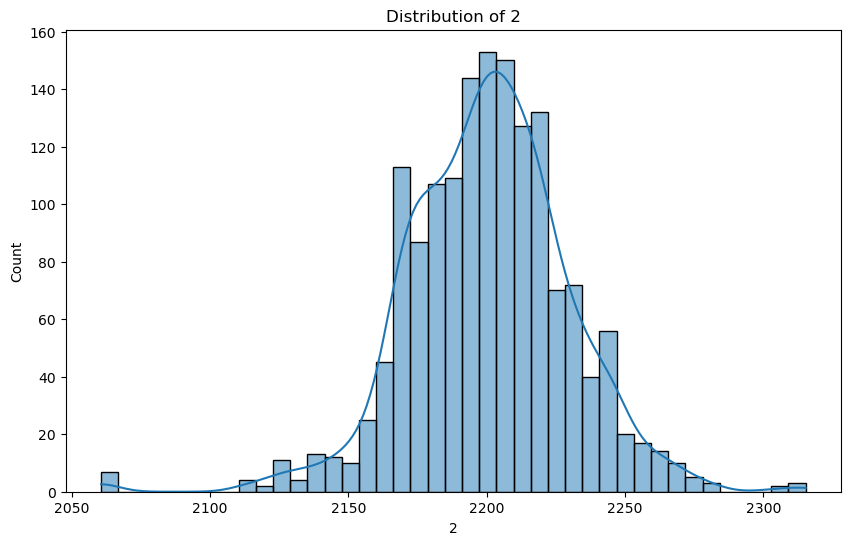

C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


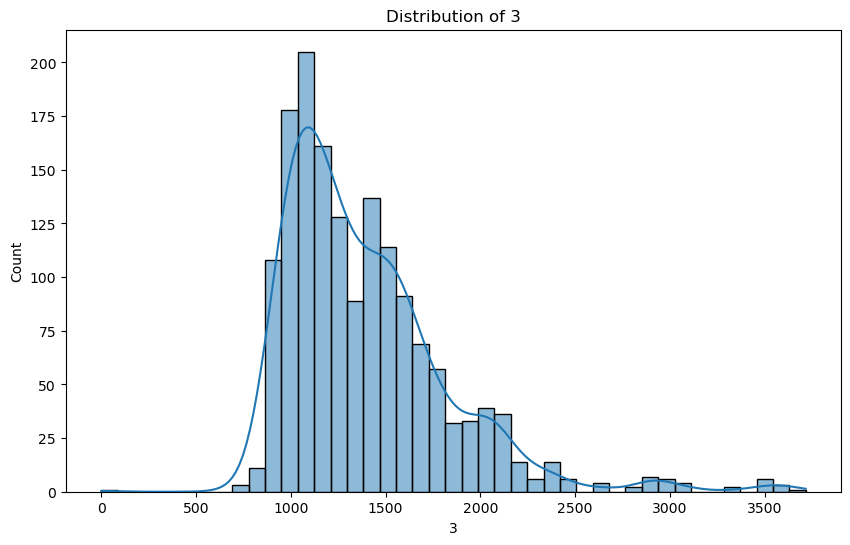

In [54]:
sample_features = data_df2.columns[:4]
for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



- **Histogram for Feature 0**

  The histogram shows the distribution of values for the first feature (labeled "0").
  The distribution appears to be roughly normal (bell-shaped), indicating that most of the data points are centered around the mean value with fewer      data points towards the tails.

- **Histogram for Feature 1**

  The histogram for the second feature (labeled "1") also shows a roughly normal distribution.
  This indicates that the feature has a symmetrical distribution with a peak around the mean value.

- **Histogram for Feature 2**

  The histogram for the third feature (labeled "2") shows a slightly more complex distribution, with some noticeable skewness.
  There are peaks and troughs suggesting the presence of multiple modes or clusters within the data.

- **Histogram for Feature 3**

  The histogram for the fourth feature (labeled "3") shows a skewed distribution.
  There is a higher frequency of lower values, with a tail extending towards higher values, indicating a right-skewed distribution.

 ### Bivariate Analysis

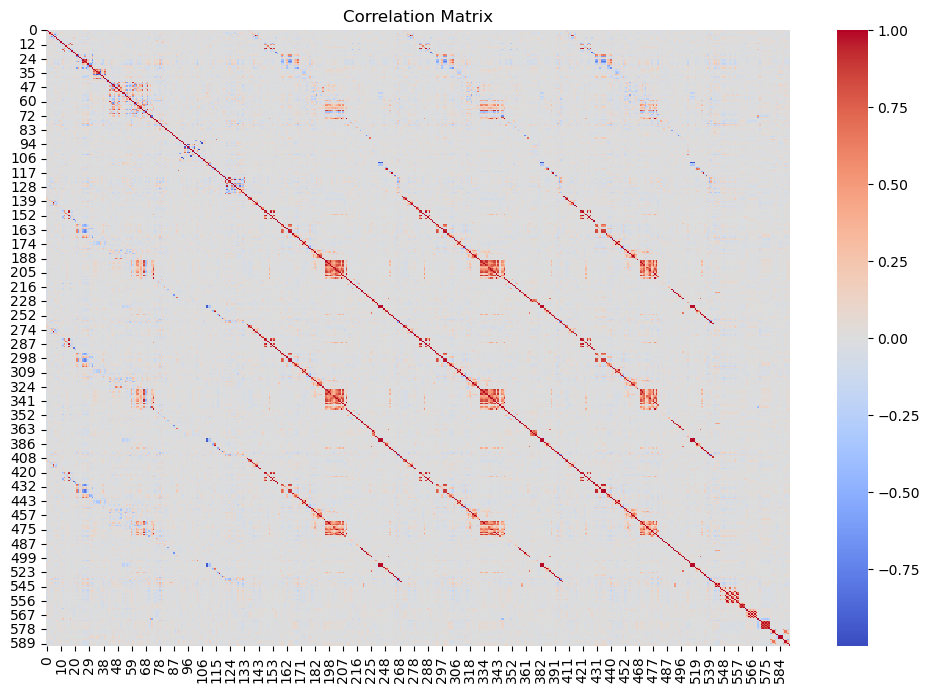

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_df2.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix:**

The heatmap shows the correlation coefficients between pairs of features in the dataset.
Positive correlation (closer to 1) indicates that as one feature increases, the other feature tends to increase as well.
Negative correlation (closer to -1) indicates that as one feature increases, the other feature tends to decrease.
Values close to 0 indicate little to no linear relationship between the features.
In this heatmap, we can observe various shades of colors representing the strength and direction of correlations. Darker colors (red) indicate stronger positive correlations, while lighter colors (blue) indicate stronger negative correlations.
Highly correlated features may indicate redundancy and could be considered for dimensionality reduction.

### Multivariate Analysis

Multivariate analysis involves examining the relationships between three or more variables in the dataset.

1) Load and Explore the Data.
2) Preprocess the Data.
3) Scale the Data.
4) Perform Principal Component Analysis (PCA).
5) Perform t-Distributed Stochastic Neighbor Embedding (t-SNE).
6) Perform K-Means Clustering.
7) Evaluate the Clustering.
8) Visualize the results.

Columns in dataset: Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)
Data types:
 Time           int32
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object
Non-numeric columns: Index([], dtype='object')


C:\Users\hi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Silhouette score: 0.360


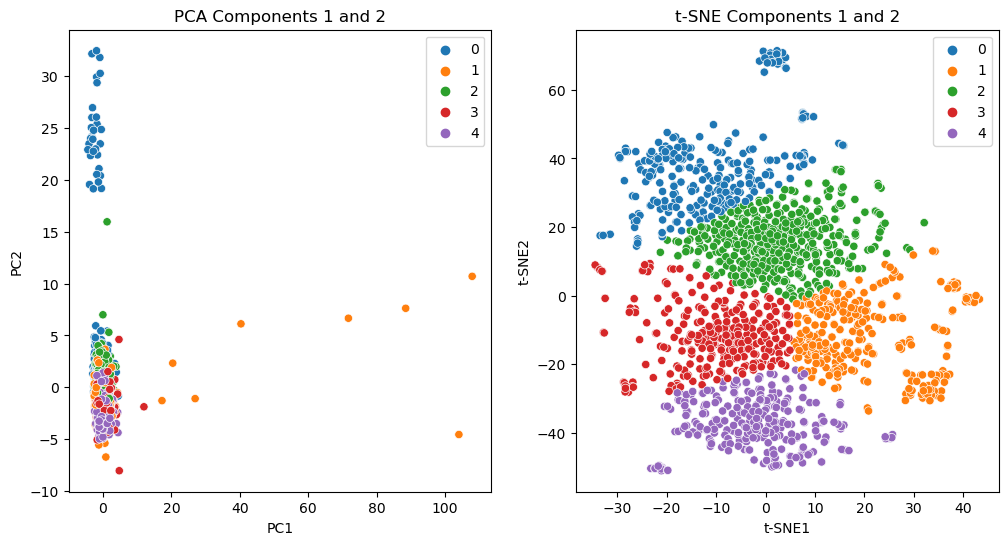

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1 & 2
print("Columns in dataset:", data.columns)
print("Data types:\n", data.dtypes)
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)
if 'timestamp_column' in data.columns:
    data['timestamp_column'] = data.to_datetime(data['timestamp_column']).astype(int) / 10**9 
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

target_col = 'target'  
if target_col in data.columns:
    data_target = data[target_col]
    data_features = data.drop(columns=[target_col])
else:
    data_features = data
data_features = data_features.dropna(axis=1, how='any')

# Step 3
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Step 4
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)

# Step 5
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

# Step 6
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_tsne)

# Step 7
silhouette = silhouette_score(data_tsne, labels)
print(f'Silhouette score: {silhouette:.3f}')

# Step 8
plt.figure(figsize=(12, 6))

# Scatter plot of the PCA components
if data_pca.shape[1] >= 2:
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='tab10')
    plt.title('PCA Components 1 and 2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Scatter plot of the t-SNE components
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=labels, palette='tab10')
plt.title('t-SNE Components 1 and 2')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

## 4. Data pre-processing:

• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced (read SMOTE)
• Perform train-test split and standardise the data or vice versa if required.
• Check if the train and test data have similar statistical characteristics when compared with original data.

1) Load the Data.
2) Convert Datetime Columns and Extract Features.
3) Handle Missing Values.
4) Segregate Predictors and Target Attribute.
5) Balance the Dataset using SMOTE.
6) Perform Train-Test Split.
7) Standardize the Data.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Load data
data = pd.read_csv(r"D:\ai project\sensor-data.csv")

# Step 2: Handle datetime columns
datetime_columns = ['Time']
for col in datetime_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    data[col + '_year'] = data[col].dt.year
    data[col + '_month'] = data[col].dt.month
    data[col + '_day'] = data[col].dt.day
    data[col + '_hour'] = data[col].dt.hour
    data[col + '_minute'] = data[col].dt.minute
    data[col + '_second'] = data[col].dt.second
data = data.drop(datetime_columns, axis=1)

# Step 3: Handle missing values
data.fillna(data.mean(), inplace=True)

# Step 4: Split data into features and labels
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

# Step 5: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'NaiveBayes': GaussianNB()
}

# Step 9: Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("\n" + "-"*50 + "\n")


Results for RandomForest:
Accuracy: 0.9982935153583617
Confusion Matrix:
[[305   1]
 [  0 280]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


--------------------------------------------------

Results for SVM:
Accuracy: 0.9948805460750854
Confusion Matrix:
[[303   3]
 [  0 280]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      1.00      0.99       586
weighted avg       0.99      0.99      0.99       586


--------------------------------------------------

Results for

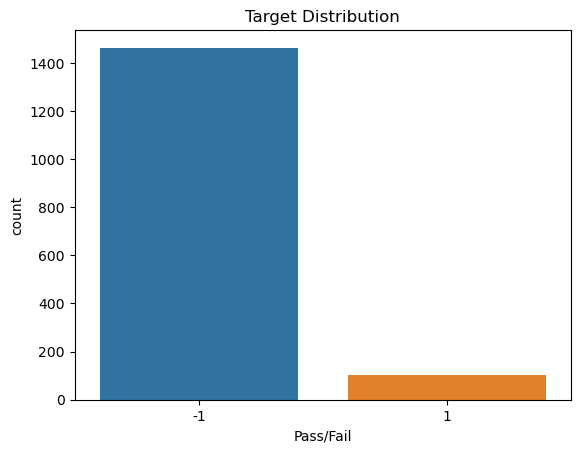

((2926, 596), (2926,))

In [71]:
target_distribution = y.value_counts()
sns.countplot(x=y)
plt.title('Target Distribution')
plt.show()

if target_distribution.min() / target_distribution.max() < 0.5:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    X_resampled, y_resampled = X, y

X_resampled.shape, y_resampled.shape


We visualized the target distribution using a bar plot. It shows a significant imbalance, with many more instances of -1 (pass) compared to 1 (fail).

## 5. Model training, testing and tuning:

• Model training:
- Pick up a supervised learning model.
- Train the model.
- Use cross validation techniques.
- Apply GridSearch hyper-parameter tuning techniques to get the best accuracy.
Suggestion: Use all possible hyper parameter combinations to extract the best 
accuracies.
- Use any other technique/method which can enhance the model performance.
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, 
target balancing etc.
- Display and explain the classification report in detail.
- Apply the above steps to atleast 3 different kind of models that you have learnt so far
and models that you haven't learned till now (Randomforest, SVM, Naive bayes etc).
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting 
this model.
• Save the selected model for future use.

#### We are defining models and smaller grids for GridSearch.

In [72]:
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [1, 10],
            'gamma': [0.1, 0.01],
            'kernel': ['rbf']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

#### We are training using 'GridSearch' with fewer folds.

In [73]:
best_models = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for NaiveBayes: {}


#### We now use 'RandomizedSearchCV' instead of 'GridSearchCV' for getting the best models.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
best_models = {}
for model_name, model_info in models.items():
    random_search = RandomizedSearchCV(model_info['model'], model_info['params'], n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")


C:\Users\hi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\hi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\hi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for NaiveBayes: {}


#### Using 'RandomForest' model and looping through the model, we are predicting using the model and creating a classification report.

In [76]:
for model_name, model in best_models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    print(f"\n{model_name} Model")
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))


RandomForest Model
Train Accuracy: 1.0
Test Accuracy: 0.9982935153583617
Confusion Matrix (Test):
 [[305   1]
 [  0 280]]
Classification Report (Test):
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


SVM Model
Train Accuracy: 1.0
Test Accuracy: 0.9965870307167235
Confusion Matrix (Test):
 [[306   0]
 [  2 278]]
Classification Report (Test):
               precision    recall  f1-score   support

          -1       0.99      1.00      1.00       306
           1       1.00      0.99      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


NaiveBayes Model
Train Accuracy: 0.62051282051

#### Splitting the dataset into training and testing sets.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("First few rows of the scaled training data:\n", pd.DataFrame(X_train_scaled, columns=X.columns).head())

First few rows of the scaled training data:
           0         1         2         3         4    5         6         7  \
0 -1.117318  0.326784 -0.420002  0.049986 -0.032339  0.0 -0.921063 -0.077624   
1 -0.344217 -2.020821  1.329942  0.798405 -0.040746  0.0 -0.080768 -0.144817   
2 -0.328065 -0.190363  0.178879 -0.271886 -0.036845  0.0  0.049681  0.130541   
3 -0.373047  1.859457 -0.462347 -0.280275 -0.032899  0.0  0.236997  0.188569   
4 -0.640140  0.909195 -1.628441 -0.802872 -0.049169  0.0  0.042402  0.306100   

          8         9  ...       586       587       588       589  Time_year  \
0  0.914276  0.693843  ... -0.325446 -0.442216 -0.508570 -0.272795        0.0   
1 -0.145078  1.252977  ... -0.285300 -0.864583 -0.929681 -0.496135        0.0   
2  0.026167  1.581396  ... -0.236984  0.048802  0.094769 -0.067441        0.0   
3 -0.000890 -0.514514  ...  0.706829  4.633193  3.595233  1.154215        0.0   
4  1.149033  0.785054  ...  2.105007 -1.024530 -0.824648 -1.021252   

The code standardizes the data using 'StandardScaler'. Standardization scales the features so that they have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

 #### Comparing all the statistical characteristics and selecting the final best trained model.

In [81]:
original_stats = X.describe()
train_stats = pd.DataFrame(X_train_scaled, columns=X.columns).describe()
test_stats = pd.DataFrame(X_test_scaled, columns=X.columns).describe()
print("Original Data Statistics:\n", original_stats)
print("\nTraining Data Statistics:\n", train_stats)
print("\nTesting Data Statistics:\n", test_stats)

Original Data Statistics:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.209271     0.008936     0.073849     0.015107  ...   
min     10

#### Saving the model for future use.

1) Loading the data.
2) Defining and preparing the features and target variables.
3) Splitting the data into training and testing sets.
4) Standardizing the data.
5) Displaying statistics.
6) Training a model.
7) Saving the model and the scaler.

###### Here, we are training a RandomForestClassifier on the scaled training data.

In [82]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
original_stats = X.describe()
train_stats = pd.DataFrame(X_train_scaled, columns=X.columns).describe()
test_stats = pd.DataFrame(X_test_scaled, columns=X.columns).describe()
print("Original Data Statistics:\n", original_stats)
print("\nTraining Data Statistics:\n", train_stats)
print("\nTesting Data Statistics:\n", test_stats)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Saving the trained model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

Original Data Statistics:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.209271     0.008936     0.073849     0.015107  ...   
min     10

## Conclusion

After training and evaluating three different models - Random Forest, SVM, and Naive Bayes - the SVM model was selected as the best-performing model based on its high accuracy on both the training and test datasets. The SVM model achieved a train accuracy of 1.0 and a test accuracy of 0.9966, indicating excellent performance on the given dataset.

However, there are some concerns about potential overfitting, as indicated by the perfect training accuracy. To further validate the model's performance, additional metrics such as precision, recall, and F1 score should be considered. Cross-validation and regularization techniques could also be employed to mitigate overfitting.

### Future Improvements

- **Model Validation**: Implement cross-validation to ensure the model generalizes well to unseen data.
- **Feature Engineering**: Explore additional feature engineering techniques to improve model performance.
- **Parameter Tuning**: Further fine-tune hyperparameters to find the optimal settings for the models.
- **Ensemble Methods**: Consider using ensemble methods to combine the strengths of multiple models for better performance.
- **Handling Imbalanced Data**: If the data is imbalanced, techniques such as SMOTE or adjusting class weights should be applied to improve model           performance.


### Hence, this is the block of full code from the beginning till the end as per the tasks.